# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Notes" data-toc-modified-id="Notes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Notes</a></div><div class="lev1 toc-item"><a href="#import-packages" data-toc-modified-id="import-packages-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>import packages</a></div><div class="lev1 toc-item"><a href="#quick-example" data-toc-modified-id="quick-example-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>quick example</a></div><div class="lev2 toc-item"><a href="#Look-at-the-first-10-items" data-toc-modified-id="Look-at-the-first-10-items-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Look at the first 10 items</a></div><div class="lev2 toc-item"><a href="#Write-results-to-file?" data-toc-modified-id="Write-results-to-file?-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Write results to file?</a></div><div class="lev1 toc-item"><a href="#Making-POST-requests-to-the-API" data-toc-modified-id="Making-POST-requests-to-the-API-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Making POST requests to the API</a></div><div class="lev2 toc-item"><a href="#Making-a-basic-post" data-toc-modified-id="Making-a-basic-post-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Making a basic post</a></div><div class="lev3 toc-item"><a href="#Write-query" data-toc-modified-id="Write-query-411"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Write query</a></div><div class="lev3 toc-item"><a href="#Write-and-make-request,-get-response" data-toc-modified-id="Write-and-make-request,-get-response-412"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Write and make request, get response</a></div><div class="lev2 toc-item"><a href="#Collections-Search" data-toc-modified-id="Collections-Search-42"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Collections Search</a></div><div class="lev2 toc-item"><a href="#Filtered-search" data-toc-modified-id="Filtered-search-43"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Filtered search</a></div><div class="lev1 toc-item"><a href="#Aggregation-Queries" data-toc-modified-id="Aggregation-Queries-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Aggregation Queries</a></div><div class="lev2 toc-item"><a href="#Aggregated-Dates" data-toc-modified-id="Aggregated-Dates-51"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Aggregated Dates</a></div><div class="lev2 toc-item"><a href="#Aggregated-Creators" data-toc-modified-id="Aggregated-Creators-52"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Aggregated Creators</a></div><div class="lev2 toc-item"><a href="#neat-example?" data-toc-modified-id="neat-example?-53"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>neat example?</a></div><div class="lev2 toc-item"><a href="#Aggregated-date,-subject-and-creator" data-toc-modified-id="Aggregated-date,-subject-and-creator-54"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Aggregated date, subject and creator</a></div><div class="lev1 toc-item"><a href="#Using-nltk" data-toc-modified-id="Using-nltk-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Using <code>nltk</code></a></div><div class="lev2 toc-item"><a href="#Frequency-plot" data-toc-modified-id="Frequency-plot-61"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Frequency plot</a></div>

# Notes

See [UBC OC Online](https://open.library.ubc.ca/research) for making queries the non-interactive way. This will help with constructing queries programmatically. 

# import packages

In [1]:
# pylab inline includes np and plt
%pylab inline
import requests
import json
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# quick example

In [2]:
apiKey = 'f8fe4ee14c553f163d8915db3af4fb4c554dbbf7e19f2e38aedfa95ab258f806'

baseUrl = 'https://oc-index.library.ubc.ca/collections/'
collection = 'bcbooks'
item = '1.0222552'

response = requests.get(baseUrl + collection + '/items')

In [7]:
# Long:
# print(json.dumps(response.json(), indent=2))

## Look at the first 10 items

In [3]:
itemsList = response.json()
first10Items = []
for i in itemsList['data'][:10]:
    # print(i['_id'])
    itemsResponse = requests.get(baseUrl + collection + '/items/' + i['_id'])
    itemData = itemsResponse.json();
    # print(json.dumps(itemData, indent=2))
    first10Items.append(itemData['data'])

In [4]:
print(len(first10Items))
# Long:
# print(json.dumps(first10Items, indent=2))

10


## Write results to file? 

In [5]:
writeResultsToFile = False

if writeResultsToFile:
    with open('metadata.json', 'w') as output:
        json.dump(first10Items, output)

# Making POST requests to the API

In [12]:
printQuery = False
printResponse = False

## Making a basic post

### Write query

**Note:** the `request-objects/search-request.json` wasn't defined in the way he expected, so we've put the "correct" structure, including the "frogs" search we want to do, into a `frogs-request.json` file; we loaded that using the json package in order to generate our query and request. 

In [6]:
apiKey = 'ac40e6c2cb345593ed1691e0a8b601bba398e42d85f81f893c5ab709cec63c6c'
searchUrl ='https://oc-index.library.ubc.ca/search?api_key='

with open('./request_objects/frog-request.json') as json_data:
    queryObject = json.load(json_data)

In [13]:
if printQuery:
    print('QUERY OBJECT')
    print(json.dumps(queryObject, indent=4))

### Write and make request, get response

In [14]:
search = requests.post(searchUrl + apiKey, json=queryObject)

In [15]:
if printResponse:
    print('RESPONSE')
    print(json.dumps(search.json(), indent=4))

## Collections Search

A new type of search, but the 'index' has changed. *cf.* `collections-search.json`. Basically, constrains results to a particular collection

## Filtered search

Can construct complex query objects. *cf.* `filtered-search.json` for an example json structure.

In [16]:
with open('./request_objects/filtered-search.json') as json_data:
    filterQueryObject = json.load(json_data)

In [26]:
print('QUERY OBJECT')
print(json.dumps(filterQueryObject, indent=4))

QUERY OBJECT
{
    "from": 0,
    "body": {
        "sort": {
            "_score": {
                "order": "desc"
            }
        },
        "fields": [
            "creator",
            "description",
            "subject",
            "title"
        ],
        "query": {
            "filtered": {
                "filter": {
                    "bool": {
                        "must": [
                            {
                                "terms": {
                                    "genre.raw": [
                                        "Report"
                                    ],
                                    "execution": "and"
                                }
                            },
                            {
                                "range": {
                                    "ubc.date.sort": {
                                        "lte": 396718367610,
                                        "gte": -755828599190
              

In [24]:
filterSearch = requests.post(searchUrl + apiKey, json=filterQueryObject)

In [25]:
print('RESPONSE')
print(json.dumps(filterSearch.json(), indent=4))

RESPONSE
{
    "data": {
        "data": {
            "took": 63,
            "hits": {
                "total": 4,
                "hits": [
                    {
                        "_type": "object",
                        "_id": "1.0075907",
                        "_score": 0.04792115,
                        "_index": "dsp.52383-2017-03-10",
                        "fields": {
                            "subject": [
                                "Health human resources",
                                "Physicians -- British Columbia -- Statistics"
                            ],
                            "creator": [
                                "Muir, Gordon E."
                            ],
                            "title": [
                                "Selected tables of directory active physicians by RHD by community as at September 1977 and September 1978"
                            ]
                        }
                    },
                  

# Aggregation Queries

## Aggregated Dates

In [27]:
with open ('./request_objects/aggregate-date.json') as json_data:
    aggQueryObject = json.load(json_data)

In [28]:
aggSearch = requests.post(searchUrl + apiKey, json=aggQueryObject)

In [29]:
print(json.dumps(aggSearch.json(), indent=4))

{
    "data": {
        "data": {
            "took": 2,
            "hits": {
                "total": 2730,
                "hits": [],
                "max_score": 0
            },
            "timed_out": false,
            "_shards": {
                "total": 20,
                "failed": 0,
                "successful": 20
            },
            "aggregations": {
                "date_hist": {
                    "buckets": [
                        {
                            "doc_count": 2,
                            "key_as_string": "1854-01-01",
                            "key": -3660595200000
                        },
                        {
                            "doc_count": 5,
                            "key_as_string": "1859-01-01",
                            "key": -3502828800000
                        },
                        {
                            "doc_count": 2,
                            "key_as_string": "1863-01-01",
                  

## Aggregated Creators

In [30]:
with open ('./request_objects/aggregate-creator.json') as json_data:
    aggQueryObject = json.load(json_data)

In [31]:
aggSearch = requests.post(searchUrl + apiKey, json=aggQueryObject)

In [32]:
print(json.dumps(aggSearch.json(), indent=4))

{
    "data": {
        "data": {
            "took": 2,
            "hits": {
                "total": 2730,
                "hits": [],
                "max_score": 0
            },
            "timed_out": false,
            "_shards": {
                "total": 20,
                "failed": 0,
                "successful": 20
            },
            "aggregations": {
                "creator": {
                    "buckets": [
                        {
                            "key": "Frank, Leonard",
                            "doc_count": 101
                        },
                        {
                            "key": "Cash, Jack",
                            "doc_count": 94
                        },
                        {
                            "key": "Jack Cash Photographic Studios",
                            "doc_count": 85
                        },
                        {
                            "key": "Lovick Studio",
                    

## neat example?

See `final-scripts/oc-viz.py` for a nice plot.

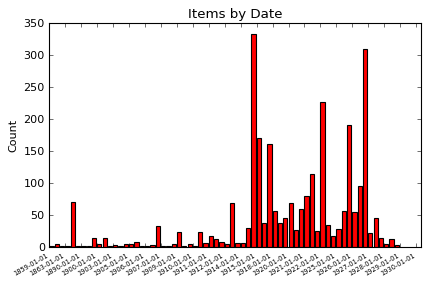

In [41]:
%run final_scripts/oc_viz.py

## Aggregated date, subject and creator

In [34]:
with open ('./request_objects/aggregate-date-subj-creator.json') as json_data:
    aggQueryObject = json.load(json_data)

In [35]:
aggSearch = requests.post(searchUrl + apiKey, json=aggQueryObject)

In [36]:
print(json.dumps(aggSearch.json(), indent=4))

{
    "data": {
        "data": {
            "took": 5,
            "hits": {
                "total": 2730,
                "hits": [],
                "max_score": 0
            },
            "timed_out": false,
            "_shards": {
                "total": 20,
                "failed": 0,
                "successful": 20
            },
            "aggregations": {
                "date_hist": {
                    "buckets": [
                        {
                            "subject": {
                                "buckets": [
                                    {
                                        "key": "Equipment",
                                        "doc_count": 2
                                    },
                                    {
                                        "key": "Lumber",
                                        "doc_count": 2
                                    },
                                    {
                            

# Using `nltk`

In [ ]:
import nltk

`re` is regular expressions

In [43]:
import math, re, string

In [44]:
# load the metadata we saved
with open('./final_scripts/metadata.json') as json_data:
    metadata = json.load(json_data)

In [58]:
fullTexts = []
for item in metadata:
    fullTexts.append(item['FullText'][0]['value'])

In [46]:
# get total length of full texts
print(len(''.join(fullTexts)))

1430952


In [47]:
nltk.download('punkt') # word tokenizer
nltk.download('stopwords') # stop words
from nltk import word_tokenize

[nltk_data] Downloading package punkt to /Users/berkas/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/berkas/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [48]:
# Tokenize the text (get individual 'words')

# allTokens = []
# for fullText in fullTexts:
#     tokenizedText = word_tokenize(fullText)
#     allTokens += tokenizedText
#
# #print
# print(allTokens)

# clean the text before tokenizing to get better results

allTokens = []
for fullText in fullTexts:
    # Lower case full text
    cleanFullText = fullText.lower()
    # Remove everything but words
    pattern = re.compile('[\W_]+') # (using regular expressions, remove non-word characters)
    cleanFullText = pattern.sub(' ', cleanFullText)
    tokenizedText = word_tokenize(cleanFullText)
    allTokens += tokenizedText

In [55]:
print('Number of words: {}'.format(len(allTokens)))

Number of words: 247051


In [56]:
print('Number of unique words: {}'.format(len(set(allTokens))))

Number of unique words: 16858


In [59]:
# Remove stopwords
stopwords = nltk.corpus.stopwords.words('English')

In [61]:
stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your']

In [100]:
'the' in stopwords

True

In [ ]:
noStopWords = [word for word in allTokens if word not in stopwords]

In [101]:
noSingles = [word for word in noStopWords if len(word) > 1]

In [102]:
# NLTK.Text
text = nltk.Text(noSingles)

# Collocations (words that frequently appear together)
colos = text.collocations()
print(colos)

united states; great britain; british columbia; treaty washington;
grand lodge; sir alexander; grand master; new westminster; alabama
claims; britannic majesty; vancouver island; san francisco; hudson
bay; alexander cockburn; rocky mountains; canadian pacific; jaune
cache; british government; pacific railway; grand secretary
None


In [103]:
# count
print(text.count('inlet'))

97


In [104]:
print(text.similar('inlet'))

head canal
None


In [105]:
# words in similar contexts
print(text.similar('ship'))

canoe boat less dock steamboat
None


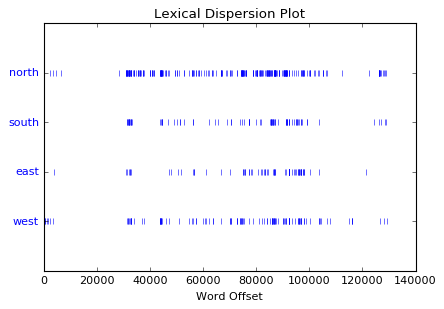

In [106]:
text.dispersion_plot(['north', 'south', 'east', 'west'])


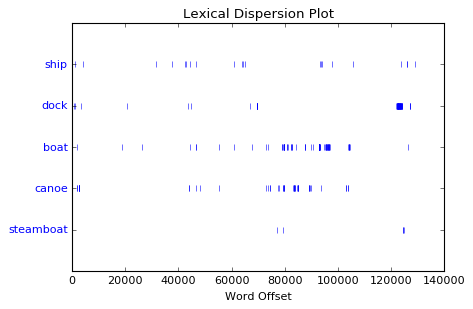

In [107]:
text.dispersion_plot(['ship', 'dock', 'boat', 'canoe', 'steamboat'])

## Frequency plot

In [108]:
# Frequency distributions!

from nltk import FreqDist
fdist = FreqDist(text)

In [109]:
print(fdist.hapaxes()) # words that occur only once

['937', 'comparatiye', 'jannary', 'francs', 'enfield', 'degeneration', '665', 'fnom', '624', 'beautifier', 'gorges', 'wa3', 'joly', 'prints', 'sui9', 'apocryphal', 'mediaeval', 'instigation', 'symptoms', '8ir', 'pocky', 'alleviate', 'tario', 'uue', 'unwillingly', 'nookeetz', 'shallon', 'picnic', 'committing', 'metallic', '1274', 'pleaded', 'hostilis', 'noi', 'murdoch', 'buildingsall', 'evans', 'drainage', 'contribution', 'mortar', 'belleisle', 'overebme', 'gallant', 'remembrance', 'necessarv', 'dodge', 'anger', 'anns', 'torderdthat', 'major', '204', 'unexpired', 'totalreceipts', 'estopped', 'i28', 'followjd', 'magic', 'backward', 'wre', '991', '197j', 'prophet', 'queries', 'drives', 'carlnajivon', 'instruct', 'charms', 'migration', 'festoons', 'contry', 'columbians', 'seo', 'manuscripts', 'inability', 'narration', 'arcs', 'missimpi', 'deliberately', '670', 'retaliation', 'misjudgment', 'frjqm', 'tionsj', 'motoimns', 'irritability', 'hoss', 'perpetrates', 'seals', 'nothwithstanding', 'c

In [110]:
print(fdist.most_common(50))

[('british', 685), ('states', 680), ('grand', 664), ('river', 658), ('united', 658), ('lodge', 628), ('great', 626), ('government', 606), ('may', 597), ('00', 538), ('treaty', 501), ('miles', 482), ('one', 471), ('two', 437), ('mr', 432), ('would', 406), ('columbia', 401), ('lake', 401), ('britain', 346), ('shall', 331), ('time', 325), ('made', 313), ('country', 311), ('line', 309), ('claims', 305), ('victoria', 303), ('tribunal', 298), ('case', 282), ('found', 265), ('report', 263), ('north', 262), ('sir', 261), ('point', 261), ('washington', 253), ('day', 247), ('party', 240), ('following', 234), ('new', 234), ('order', 226), ('part', 223), ('three', 217), ('feet', 215), ('said', 214), ('first', 212), ('upon', 210), ('000', 209), ('also', 208), ('question', 205), ('present', 198), ('50', 196)]


In [74]:
fdist.hapaxes?

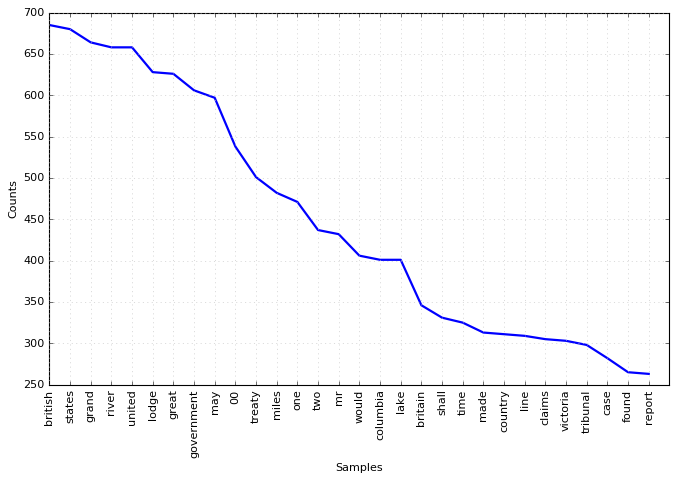

In [111]:
plt.figure(figsize=(10, 6));
fdist.plot(30);